In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image
# from matplotlib.pyplot import imshow

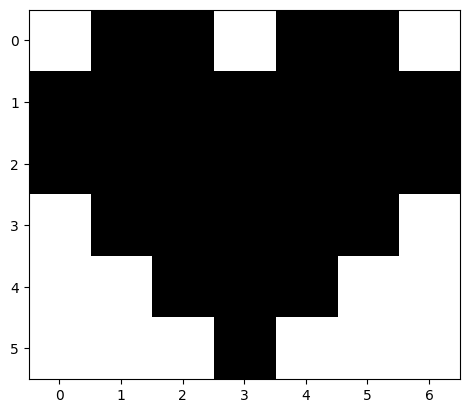

In [2]:
def show_image(A):
  plt.imshow(1-A, cmap='gray')
  plt.show()


D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
show_image(D)

In [3]:
U, sigma, V = np.linalg.svd(D)
U = np.matrix(U)
V = np.matrix(V)
Vt = np.transpose(V)

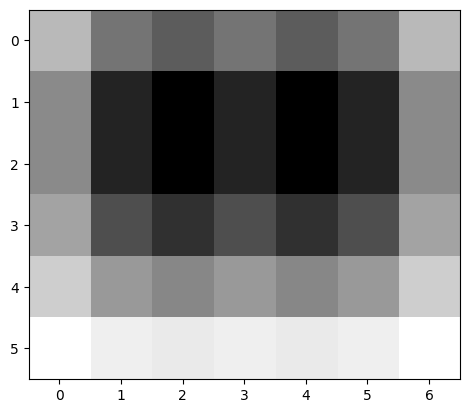

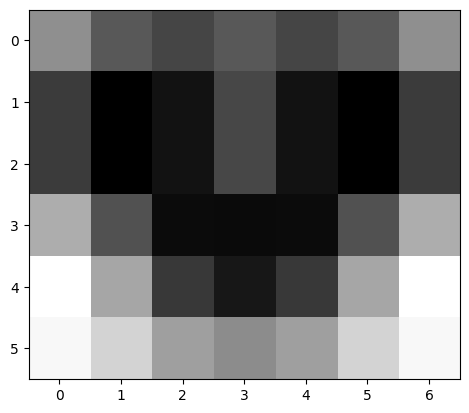

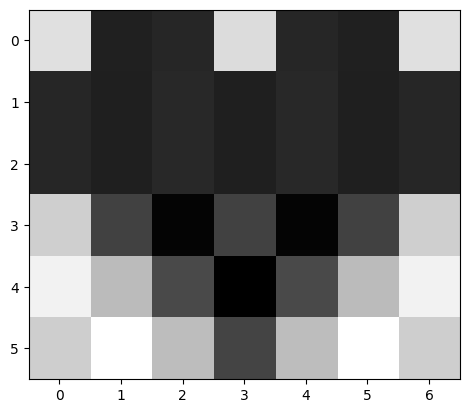

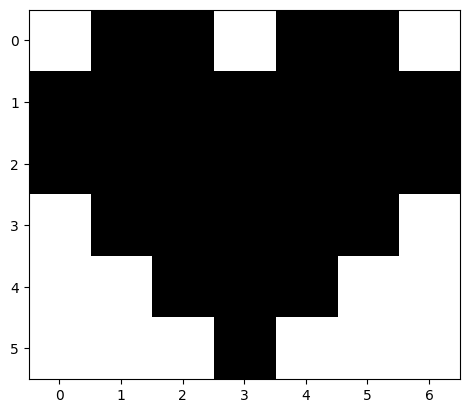

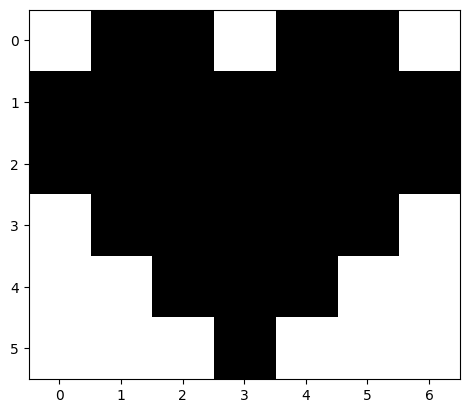

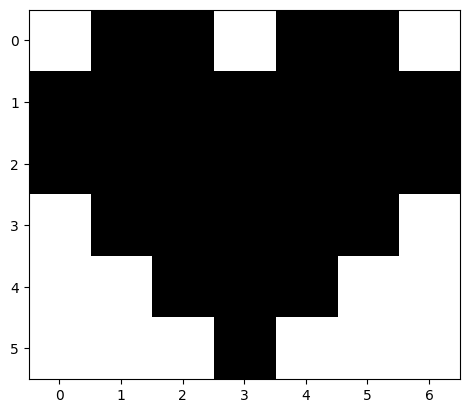

In [4]:
C = []

count = 0;
for sigma_ in sigma:
  if(len(C) == 0) :
    C.append((sigma_ * U[:,count] * V[count,:]))
  else :
    C.append(C[-1] + (sigma_ * U[:,count] * V[count,:]))
  show_image(C[count])
  count = count +1

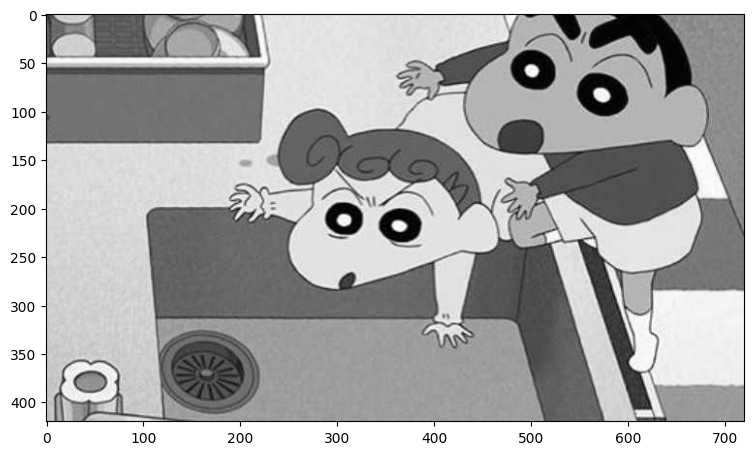

In [106]:
img = Image.open('/content/fromandroid-7a3a8d32046bf80433983c304ce7b538.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9,6))
plt.imshow(imggray)

In [107]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [108]:
U, sigma, V = np.linalg.svd(imgmat)

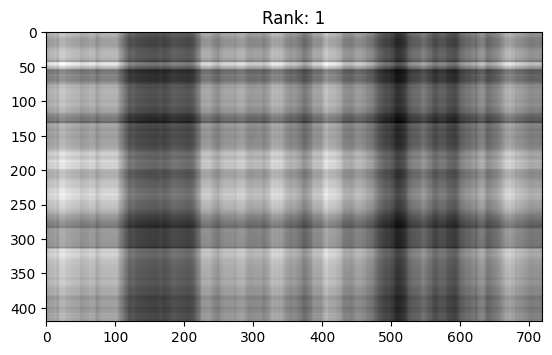

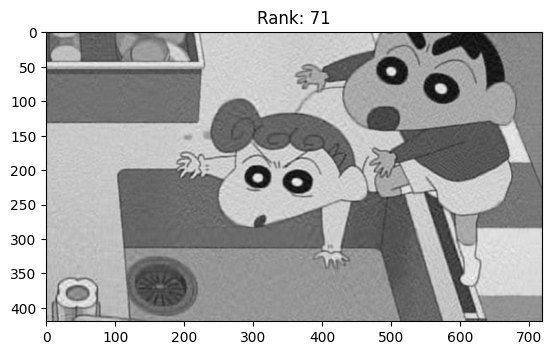

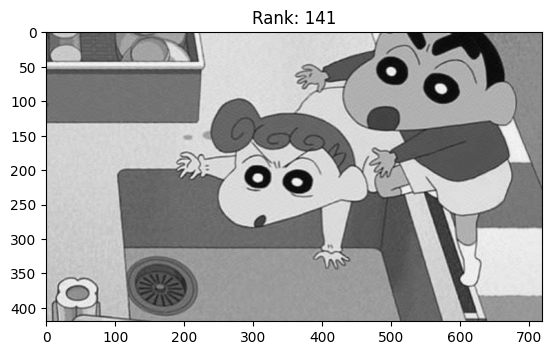

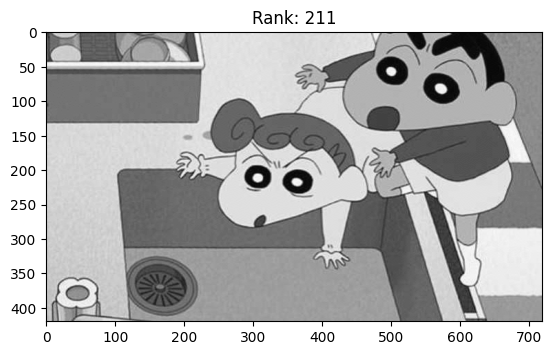

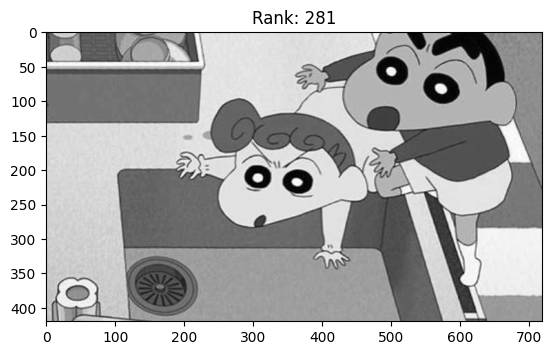

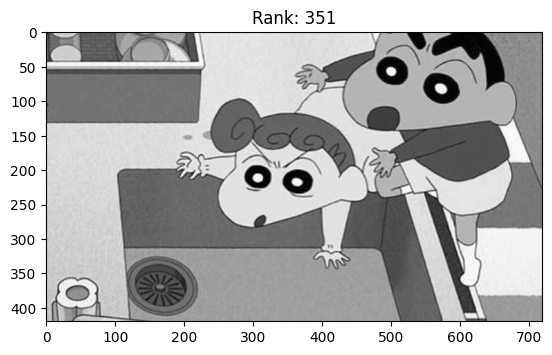

In [123]:
C = []
C_ = 0
for rank in range(0, len(sigma)):
  C_ = C_ + (sigma[rank] * U[:,rank] * V[rank,:])
  if (rank % 70 == 0):
    C.append(C_)
    title = "Rank: " + str(rank + 1)
    plt.title(title)
    plt.imshow(C_, cmap = 'gray')
    plt.show()